##Solución Parcial 3

Juan Jerónimo Castaño Rivera
Wilmer Sebastian Perez Cuastumal
Daniel Mauricio Mejia Hoyos

##Preguntas

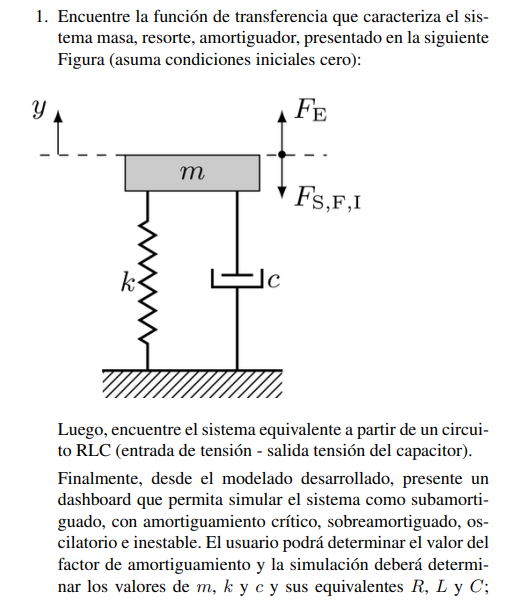

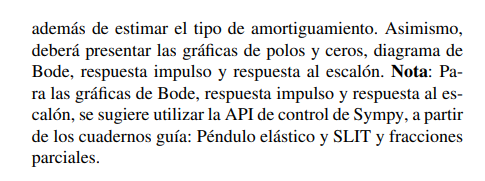

Para el sistema masa-resorte -amortiguador

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, m, c, k = sym.symbols('t m c k', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(m*y.diff(t, 2) + c*y.diff(t) + k*y, x)
ode

                         2              
  d                     d               
c⋅──(y(t)) + k⋅y(t) + m⋅───(y(t)) = x(t)
  dt                      2             
                        dt              

La función de transferencia es:

In [2]:
s = sym.symbols('s')
H = sym.Function('H')(s)

H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
H

      1       
──────────────
             2
c⋅s + k + m⋅s 

Para un circuito RLC:

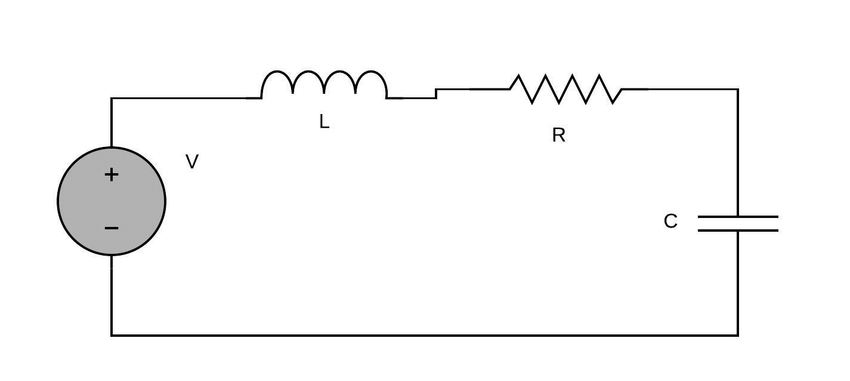

In [3]:
t, L, C, R = sym.symbols('t L C R', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(C*L*y.diff(t, 2) + C*R*y.diff(t) + y, x)
ode

     2                                    
    d               d                     
C⋅L⋅───(y(t)) + C⋅R⋅──(y(t)) + y(t) = x(t)
      2             dt                    
    dt                                    

La función de transferencia es:

In [4]:
s = sym.symbols('s')
H = sym.Function('H')(s)

H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
H

        1         
──────────────────
     2            
C⋅L⋅s  + C⋅R⋅s + 1

## Forma general (canónica) SLITs segundo orden

Para tareas de modelado y control de procesos, se suele factorizar  la función de transferencia en su forma canónica como:

$$H(s)=K\frac{\omega_n^2}{s^2+2\xi \omega_n s + \omega_n^2}$$

Las raíces del denominador (polos), se pueden entonces calcular como:

$$p_{1,2}=-\xi \omega_n \pm j \omega_n \sqrt{1-\xi^2}$$

Definiendo:

$\omega_n$: frecuencia natural no amortiguada.

$K$: Ganancia del sistema

$\xi:$ factor de amortiguamiento.

- Según el factor de amortiguamiento, los SLIT de segundo orden se caracterizan como:

$0<\xi< 1$: SLIT subamortiguado.

$\xi = 1$: SLIT con amortiguamiento crítico.

$\xi > 1$: SLIT sobreamortiguado.

$\xi = 0$: SLIT oscilatorio.

$\xi < 0$: SLIT inestable (polos en el lado deracho del plano complejo $s$).

## Respuesta transitoria SLIT segundo orden

Para cuando la entrada es un escalón

![slit2o](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/Sistemas2Orden.jpg?raw=1)





Para el sistema se cumple que:

$$\omega_d = \omega_n\sqrt{1-\xi^2}$$
$$\omega_k = \omega_n\sqrt{\xi^2-1} $$

Para el sistema MRA:

$$K=\frac{1}{k}$$

$$w_n^2=\frac{k}{m}$$

$$\xi = \frac{c}{2\sqrt{k m}}$$


Para el circuito RLC:

$$K=1$$

$$w_n^2=\frac{1}{L C}$$

$$\xi = \frac{R}{2} \sqrt{\frac{C}{L}}$$


Para cada uno de los casos, en el circuito RLC, tenemos que:

- $0<\xi< 1$: SLIT subamortiguado.

$$V_o(t)=u(t)-e^{-\xi w_n t}u(t) [cos(w_d t)+ \frac{\xi}{\sqrt{1-\xi^2}}sen(w_d t)]$$

- $\xi = 1$: SLIT con amortiguamiento crítico.

$$V_o(t)=1-(1+w_n t) e^{-w_n t} u(t)$$

- $\xi > 1$: SLIT sobreamortiguado.

$$V_o(t)=u(t)-\frac{e^{-\xi w_n t}}{\sqrt{\xi^2-1}}u(t)[\sqrt{\xi^2-1} \; cosh(w_k t)  + \xi \; senh(w_k t)]$$

- $\xi = 0$: SLIT oscilatorio.

$$V_o(t)=u(t)-cos(w_n t) u(t)$$

- $\xi < 0$: SLIT inestable (polos en el lado deracho del plano complejo $s$).

    Para el circuito RLC, el valor de $\xi$ no puede ser negativo (inplicaría un valor de resistencia negativa)

Hacemos un ejemplo ilustrativo del modelo subamortiguado partiendo del circuito RLC.

En este caso:

$$R=1Ω$$
$$L=0.5H$$
$$C=0.5F$$

Por lo tanto:

$$\xi= 0.5$$

In [5]:
RLC = {R: 1, L: sym.Rational("0.5"), C: sym.Rational("0.5")}
RLC

{C: 1/2, L: 1/2, R: 1}

In [6]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control

sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace
X = 1/s # Ajustar según tipo de entrada
H=control.TransferFunction(1,L*C*s**2 + R*C*s + 1,s) #Funcion de transferencia con la API de control
#Hlc = H/(1+H) #para lazo cerrado

Y = H.num * X /H.den#función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

          1           
──────────────────────
  ⎛     2            ⎞
s⋅⎝C⋅L⋅s  + C⋅R⋅s + 1⎠

In [7]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp

     C⋅(L⋅s + R)       1
- ────────────────── + ─
       2               s
  C⋅L⋅s  + C⋅R⋅s + 1    

In [8]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

    ⎛ -R⋅t     ⎛     ______________⎞      -R⋅t     ⎛     ______________⎞⎞    
    ⎜ ─────    ⎜    ╱      2       ⎟      ─────    ⎜    ╱      2       ⎟⎟    
    ⎜  2⋅L     ⎜t⋅╲╱  - C⋅R  + 4⋅L ⎟       2⋅L     ⎜t⋅╲╱  - C⋅R  + 4⋅L ⎟⎟    
    ⎜ℯ     ⋅cos⎜───────────────────⎟   R⋅ℯ     ⋅sin⎜───────────────────⎟⎟    
    ⎜          ⎝      2⋅√C⋅L       ⎠               ⎝      2⋅√C⋅L       ⎠⎟    
- C⋅⎜─────────────────────────────── + ─────────────────────────────────⎟ + 1
    ⎜               C                              ______________       ⎟    
    ⎜                                             ╱      2              ⎟    
    ⎝                                        √C⋅╲╱  - C⋅R  + 4⋅L        ⎠    

In [9]:
#Modelo en el tiempo con RLC evaluados
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

    ⎛ -R⋅t     ⎛     ______________⎞      -R⋅t     ⎛     ______________⎞⎞    
    ⎜ ─────    ⎜    ╱      2       ⎟      ─────    ⎜    ╱      2       ⎟⎟    
    ⎜  2⋅L     ⎜t⋅╲╱  - C⋅R  + 4⋅L ⎟       2⋅L     ⎜t⋅╲╱  - C⋅R  + 4⋅L ⎟⎟    
    ⎜ℯ     ⋅cos⎜───────────────────⎟   R⋅ℯ     ⋅sin⎜───────────────────⎟⎟    
    ⎜          ⎝      2⋅√C⋅L       ⎠               ⎝      2⋅√C⋅L       ⎠⎟    
- C⋅⎜─────────────────────────────── + ─────────────────────────────────⎟ + 1
    ⎜               C                              ______________       ⎟    
    ⎜                                             ╱      2              ⎟    
    ⎝                                        √C⋅╲╱  - C⋅R  + 4⋅L        ⎠    

In [10]:
#Función de salida Y(s) -- Laplace
Ye

     C⋅(L⋅s + R)       1
- ────────────────── + ─
       2               s
  C⋅L⋅s  + C⋅R⋅s + 1    

In [11]:
#Función de salida y(t) -- en tiempo
yt

    ⎛ -R⋅t     ⎛     ______________⎞      -R⋅t     ⎛     ______________⎞⎞    
    ⎜ ─────    ⎜    ╱      2       ⎟      ─────    ⎜    ╱      2       ⎟⎟    
    ⎜  2⋅L     ⎜t⋅╲╱  - C⋅R  + 4⋅L ⎟       2⋅L     ⎜t⋅╲╱  - C⋅R  + 4⋅L ⎟⎟    
    ⎜ℯ     ⋅cos⎜───────────────────⎟   R⋅ℯ     ⋅sin⎜───────────────────⎟⎟    
    ⎜          ⎝      2⋅√C⋅L       ⎠               ⎝      2⋅√C⋅L       ⎠⎟    
- C⋅⎜─────────────────────────────── + ─────────────────────────────────⎟ + 1
    ⎜               C                              ______________       ⎟    
    ⎜                                             ╱      2              ⎟    
    ⎝                                        √C⋅╲╱  - C⋅R  + 4⋅L        ⎠    

In [ ]:
#Diagrama de polos y ceros

HRLC=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.pole_zero_plot(HRLC)

In [ ]:
#Diagrama de Bode
control.bode_plot(HRLC)

In [ ]:
control.impulse_response_plot(HRLC)

In [ ]:
control.step_response_plot(HRLC)

Si me dan el valor de $\xi$, el programa deberá calcular los valores del sistema MRA y del circuito RLC

In [ ]:
import numpy as np
xi=float(input("Ingrese el valor de \u03BE : "))
CC=0.5
LL=0.5
RR=2*xi*np.sqrt(LL/CC)
kk=1/CC
cc=RR
mm=LL


In [ ]:
if(xi<0):
  print("Para \u03BE menor a cero, el sistema es inestable. En este caso, es imposible plantear sistemas MRA o circuitos RLC inestables. Implicarían parámetros negativos")
  print("Sin embargo, se puede realizar el proceso de hallar el diagrama de bode, diagrama de polos y ceros, respuesta escalón y respuesta impulso de manera ilustrativa")
  z=1

elif(xi==0):
  print("Para \u03BE igual a cero, el sistema es oscilado.")
  z=0

elif(xi==1):
  print("Para \u03BE igual a 1, el sistema es críticamente amortiguado.")
  z=0
elif(xi>1):
  print("Para \u03BE mayor a 1, el sistema es sobre-amortiguado.")
  z=0

elif(xi<1 and xi>0):
  print("Para \u03BE entre 0 y 1, el sistema es sub-amortiguado.")
  z=0

if (z==0):

  print("\n\nLos valores que satisfacen el valor de \u03BE del sistema MRA son:")
  print(f"k={kk}N/m")
  print(f"c={cc}Ns/m")
  print(f"m={mm}kg")

  print("\n\nLos valores que satisfacen el valor de \u03BE del sistema MRA son:")
  print(f"C={CC}F")
  print(f"L={LL}H")
  print(f"R={RR}Ω")

print(f"\n\nPara nuestro caso, w_n={1/np.sqrt(LL*CC)}")


In [ ]:
RLC = {R: sym.Rational(str(RR)), L: sym.Rational(str(LL)), C: sym.Rational(str(CC))}
RLC

In [ ]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control

sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace
X = 1/s # Ajustar según tipo de entrada
H=control.TransferFunction(1,L*C*s**2 + R*C*s + 1,s) #Funcion de transferencia con la API de control
#Hlc = H/(1+H) #para lazo cerrado

Y = H.num * X /H.den#función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

In [ ]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp

In [ ]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
yt

In [ ]:
#Modelo en el tiempo con RLC evaluados
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)

yt

In [ ]:
#Función de salida Y(s) -- Laplace
Ye

In [ ]:
#Diagrama de polos y ceros

HRLC=control.TransferFunction(H.num,H.den.subs(RLC),s)
control.pole_zero_plot(HRLC)

In [ ]:
#Diagrama de Bode
control.bode_plot(HRLC)

Respuesta al impulso

In [ ]:
control.impulse_response_plot(HRLC)

Respuesta al escalón

In [ ]:
control.step_response_plot(HRLC)

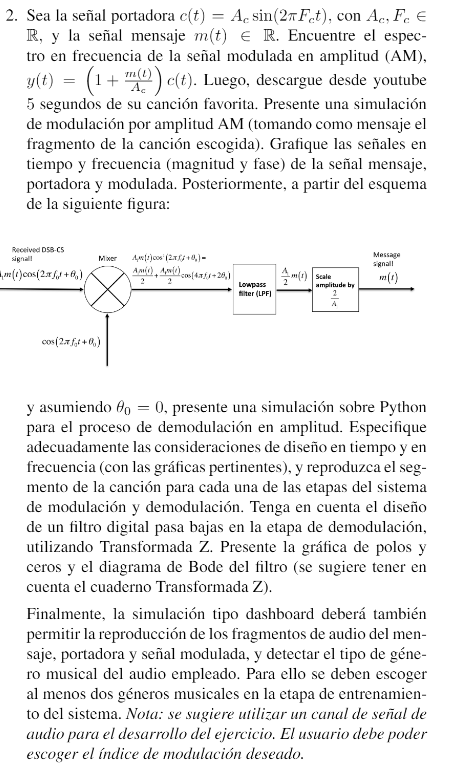

Se puede realizar a partir del ejercicio del parcial 2

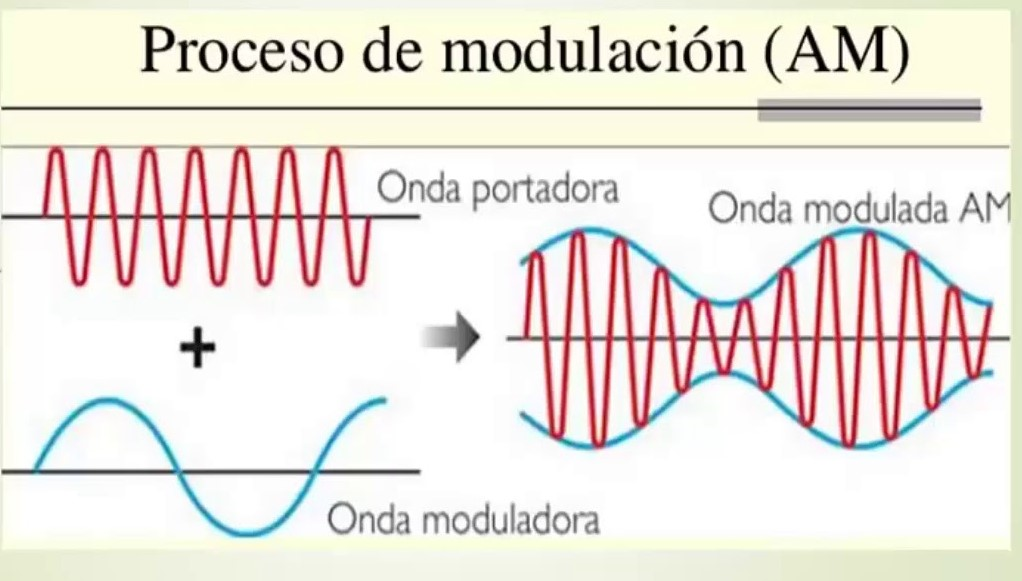

El proceso de modulación, usado principalmente en telecomunicaciones, es un proceso usado en la transmisión de señales por un medio (ya sea físico o no).

Se tiene en este caso la señal que se quiere transmitir (señal mensaje). Estas señales son principalmente de baja frecuencia, por lo que para transmitirlas de un lado a otro, se requieren de equipos muy especializados y en tanto, costosos, por lo que se aplica esta técnica.

La señal mensaje se mezcla con una señal portadora (puede ser una señal senoidal), de muy alta frecuencia, que la va a transportar por el medio.

Al mezclarlas, la señal mensaje modula a partir de su amplitud a la señal de alta frecuencia, haciendo que el mensaje original quede inscrito allí y se pueda transmitir fácilmente debido a que sigue conservando la alta frecuencia de la señal portadora

- Se requiere entonces de una portadora (carrier) senoidal/cosenoidal:

$$c(t)=A_c\sin(2\pi F_c t)$$

- Para ilustrar el proceso, se trabaja con un mensaje tipo sen/cos:

$$m(t) = A_m \cos(2\pi F_m t)$$

- La modulación AM puede calibrarse en términos del índice de modulación:

$$I_m = \frac{Peak\{|m(t)|\}}{A_c}$$

 donde $Peak\{|m(t)|\}$ es el valor pico (máximo) de $|m(t)|$.


- La señal a transmitir, señal modulada, en AM se cálcula como:

$$y(t)= \left(1+\frac{m(t)}{A_c}\right)c(t)$$

##Diagrama
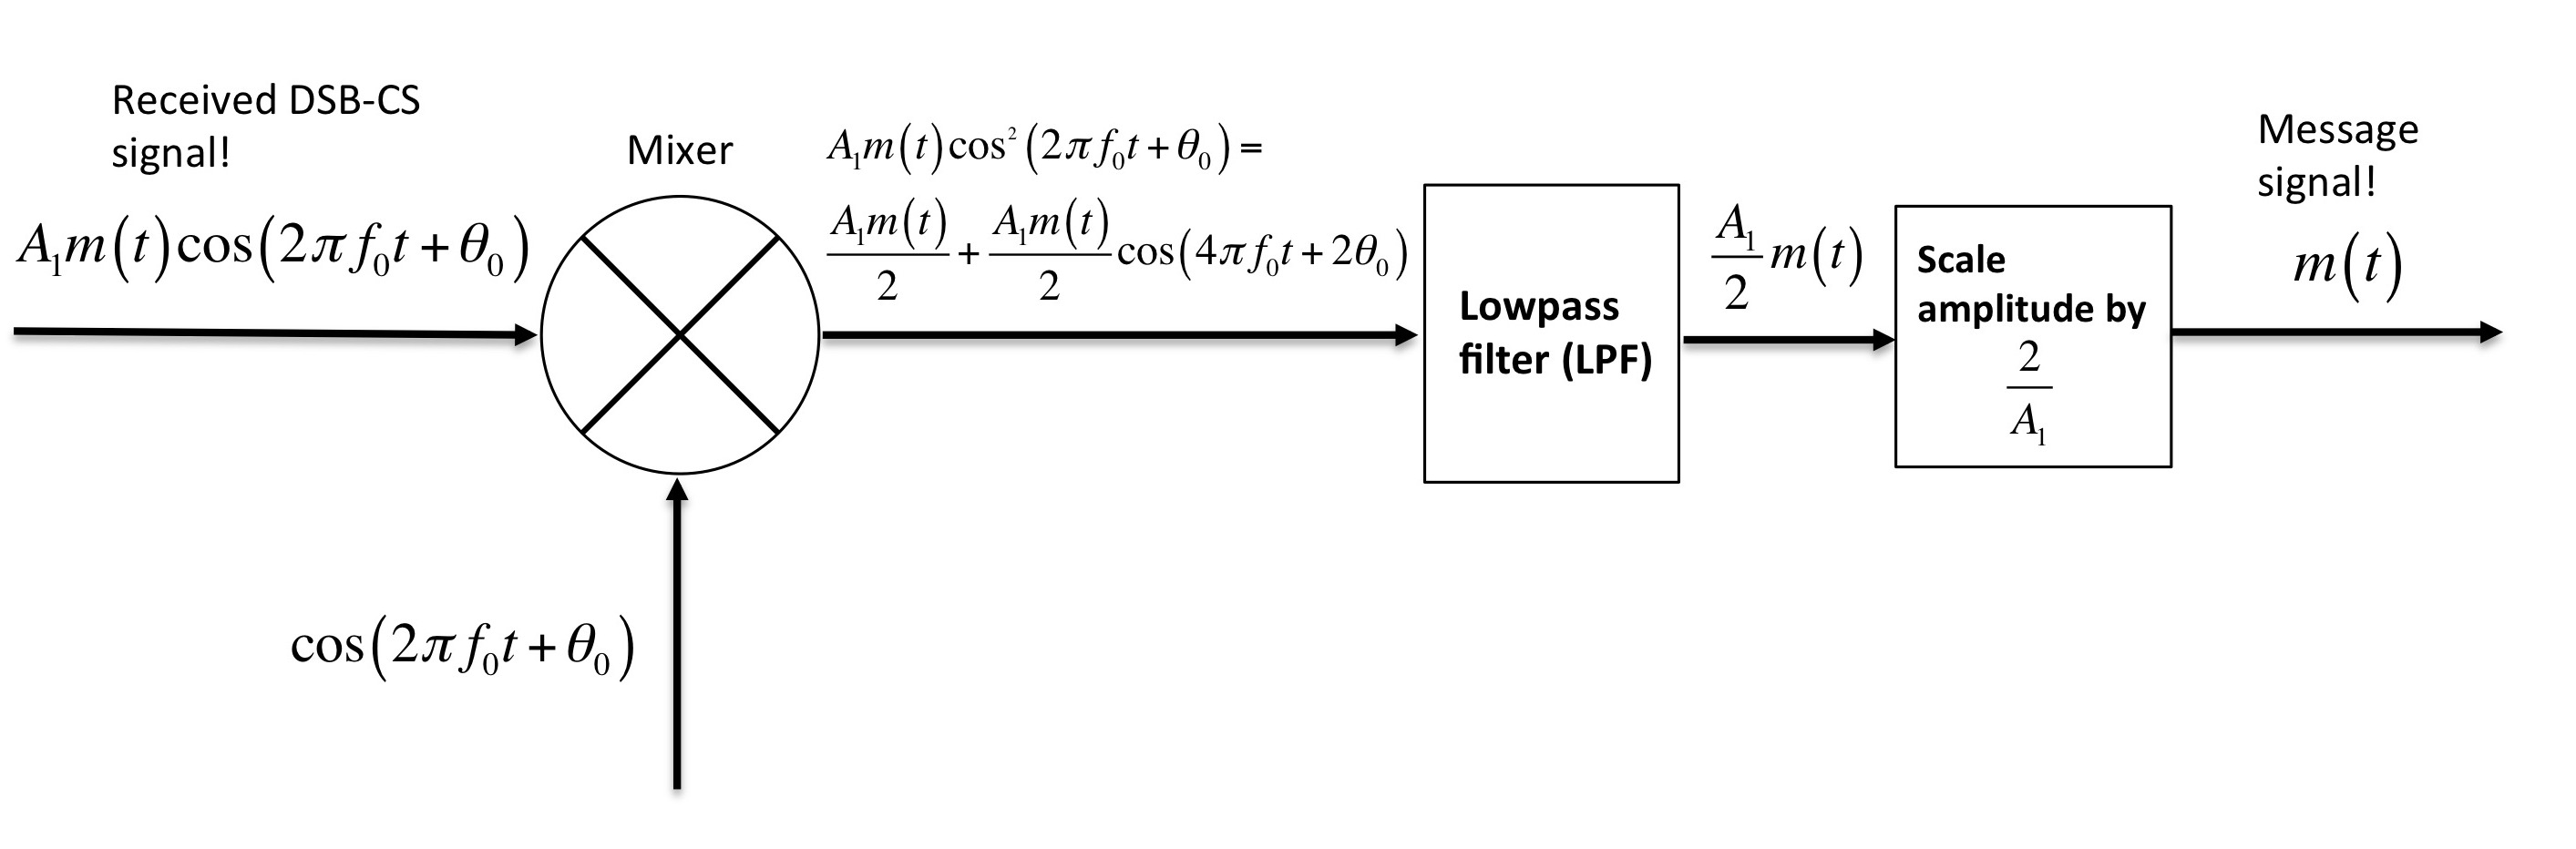

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Se instala api para descargar videos desde youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz


In [ ]:
link="https://www.youtube.com/watch?v=jRagJhQwy-Y"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}

In [ ]:
!ffmpeg -y -i audio.mp3 output.wav

In [ ]:
!pip install soundfile

In [ ]:
import soundfile as sf # para instalar pip install soundfile
#lee archivos wav
nombre_out = "output.wav"
x, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

In [ ]:
x.shape

In [ ]:
from IPython.display import Audio
Audio(x[int(fs*20):int(fs*25),:].T,rate=fs)

In [ ]:
xpro = x.copy() #copiar archivos para procesar
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
xs = xpro[int(ti*fs):int((tf*fs)),0]

tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,xs,label="Canal izquierdo")
plt.xlabel('$t[s]$')
plt.ylabel('$x(t)$')
plt.legend()
plt.show()

El usuario debe poder escoger el indice de modulación

In [ ]:
len(xs)

In [ ]:
Im=float(input("Ingrese el indice de modulacion que desea:  "))

Si el pedazo de la cancion es la señal de mensaje y la señal portadora es:
$$c(t)=A_c\sin(2\pi F_c t)$$

In [ ]:
#Frecuencia portadora y muestreo

Fc = 1000 #frecuencia de portadora

ti = 20
tf = 25 #cantidad de periodos a graficar de la

Fs = 48000 #frecuencia muestreo

t = np.arange(ti,tf,1/Fs) #vector del tiempo


Ac = max(abs(xs))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*t) #portadora
print(Ac)

In [ ]:
plt.plot(t,c,label='portadora')
plt.plot(t,xs,label='mensaje')
plt.legend()
plt.show()

In [ ]:
y = (1+xs/Ac)*c #señal modulada en AM

plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

- A continuación, se presenta el espectro de la señal mensaje (cancion), portadora y modulada.

Debido a que no hay componente imaginaria, se puede usar la transformada real rápida de fourier. Para valores de frecuencia negativo el gráfico se refleja (simetría par)

In [ ]:
Xfc = np.fft.rfft(c)
Xfm = np.fft.rfft(xs)
Xfy = np.fft.rfft(y)

vfre = np.fft.rfftfreq(len(c),1/Fs)

#plt.plot(vfre,abs(Xfy),label='modulado')
#plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

In [ ]:
plt.subplot(2,1,1)
plt.plot(vfre,abs(Xfy),label='modulado',c="r")
#plt.plot(vfre,abs(Xfm),label='mensaje')
#plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

plt.subplot(2,1,2)
#plt.plot(vfre,abs(Xfy),label='modulado',c="r")
plt.plot(vfre,abs(Xfm),label='mensaje')
#plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

Audio de la portadora

In [ ]:
Audio(c,rate=fs)

Audio del mensaje (estracto original)

In [ ]:
Audio(xs,rate=fs)

Audio de la señal modulada

In [ ]:
Audio(y,rate=fs)

Esta señal luego se pasa por un demodulador, con el fin de filtrar las frecuencias altas y modificar la amplitud, para obtener de nuevo la señal mensaje original

##Demodulación
La demodulación es el proceso inverso a la modulación. El objetivo es recuperar la señal de mensaje
m(t) a partir de la señal modulada y(t).

#Pasos Clave de la Demodulación


1.   Multiplicación por la portadora (Mixer)
2.   Filtrado Pasa-bajas
3.   Escalado



#Ecuación de la señal demodulada
$y_{demod}(t) = |LPF(y(t) \cdot c(t))|$

Se multiplica la señal modulada por una copia de la portadora para desmodularla. Esto devuelve la señal a su frecuencia original.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import butter, sosfiltfilt, hilbert
y = (1 + (xs / Ac)) * c
mixer_1=y*c #Mixer
Xfmi = np.fft.rfft(mixer_1)
Xfy = np.fft.rfft(y)

Respuesta en frecuencia de la señal modulada y la de paso por mixer

In [ ]:
#Al pasar por el mixer
plt.subplot(2,1,1)
plt.plot(vfre,abs(Xfy),label='modulado',c="r")
#plt.plot(vfre,abs(Xfm),label='mensaje')
#plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

plt.subplot(2,1,2)
#plt.plot(vfre,abs(Xfy),label='modulado',c="r")
plt.plot(vfre,abs(Xfmi),label='mixer')
#plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

Respuesta en el tiempo de la señal modulada y el paso por mixer

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(t, y)
plt.title("Señal Modulada AM")
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.subplot(3, 1, 2)
plt.plot(t, mixer_1)
plt.title("mixer")
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

Audio al paso por mixer

In [ ]:
Audio(mixer_1,rate=fs)

Después de la multiplicación, la señal contiene frecuencias de la portadora. Se aplica un filtro pasa-bajas para eliminar estas frecuencias altas y conservar solo las bajas (la señal de mensaje).
En este caso, se utilizó un **filtro Butterworth pasa-bajas** debido a varias razones que benefician la demodulación de la señal de audio:

1. **Suavidad en la Respuesta de Frecuencia**: El filtro Butterworth tiene una respuesta en frecuencia muy suave, lo que significa que no introduce picos ni resonancias no deseadas en la señal. Esto es crucial en aplicaciones de audio, ya que asegura que la calidad del sonido demodulado se mantenga lo más natural posible.

2. **Eficiente para Separar la Señal de Mensaje**: Al demodular la señal, queremos eliminar componentes de alta frecuencia que no son parte de la señal de mensaje original. Un filtro Butterworth pasa-bajas es especialmente eficaz para permitir que las frecuencias de la señal de mensaje pasen, mientras atenúa las frecuencias más altas, asegurando que se recuperen los detalles esenciales del audio.

3. **Control de la Frecuencia de Corte**: La flexibilidad en el diseño del filtro permite ajustar la frecuencia de corte de manera que se adapte a la frecuencia de la señal de mensaje.


Filtro Butterworth de orden 6 y frecuencia de corte 10000Hz

In [ ]:
from scipy.signal import butter as bw
from scipy.signal import freqz_zpk

In [ ]:
N = 6 #orden el filtro
Wn = 10000
filt = 'lowpass' #tipo del filtro (pasa-baja, pasa-alta, pasabanda, rechazabanda)
out = 'zpk' #la funcion retorna los polos y ceros junto con la ganancia. Para usar numerador y denominador usar 'ba' junto con freqz
zeros, poles, gain = bw(N, Wn, btype=filt, output=out, fs=fs)
#K = len(Xw[:,0]) #longitud del vector transformada
w, h = freqz_zpk(zeros, poles, gain, fs=fs) #Para indicar la longitud usar worN=K

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle

def plot_freq_response(filter_name, w, h, N): #Mostrar la respuesta en frecuencia del filtro
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 1, 1)
  ax1.set_title(filter_name +' Digital filter frequency response, order= ' + str(N))
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')
  ax1.set_ylabel('Amplitude [dB]', color='b')
  ax1.set_xlabel('Frequency [Hz]')
  ax1.grid()
  ax2 = ax1.twinx()
  angles = np.unwrap(np.angle(h))
  ax2.plot(w, angles, 'g')
  ax2.set_ylabel('Angle [radians]', color='g')
  plt.axis('tight')
  plt.show()

In [ ]:
def show_zp(z, p, title= 'Z-plane'): # Mostrar la ubicación de los polos y los zeros
  ax = plt.gca()

  ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms = 10)
  ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms = 10)
  unit_circle = Circle((0,0), radius=1, fill=False,
                        color='black', ls='solid', alpha=0.9)
  ax.add_patch(unit_circle)
  ax.axvline(0, color='0.7')
  ax.axhline(0, color='0.7')

  plt.title(title)
  plt.xlabel(r'Re{$z$}')
  plt.ylabel(r'Im{$z$}')
  plt.axis('equal')
  plt.xlim((-2, 2))
  plt.ylim((-2, 2))
  plt.grid()

Polos y ceros para comprobar estabilidad

In [ ]:
show_zp(zeros, poles, title='Polos y Ceros')

Diagrama de bode para observar ganancia y respuesta en frecuencia

In [ ]:
plot_freq_response('Butterworth', w, h, N)

Aplicando el proceso de filtrado a la señal del mixer  y de una vez hacer el escalamiento pertinente y aplicando transformada de fourier para obtener la respuesta en la frecuencia de ambas señales

In [ ]:
analytical_signal = hilbert(y)
envelope = np.abs(analytical_signal)
def butter_lowpass(cutoff, Fs, order=6):
    nyq = 0.5 * Fs
    normal_cutoff = cutoff / nyq
    sos = butter(order, normal_cutoff, btype='low', analog=False, output='sos')
    return sos

def butter_lowpass_filter(data, cutoff, Fs, order=6):
    sos = butter_lowpass(cutoff, Fs, order)
    y = sosfiltfilt(sos, data)
    return y
cutoff = 10000
fin = butter_lowpass_filter(envelope, cutoff, Fs)
fin -= np.mean(fin)
amplitude_ratio = np.max(np.abs(xs)) / np.max(np.abs(fin))
filt = fin * amplitude_ratio
filt_2 =    fin * amplitude_ratio*1.5
Xfilt=np.fft.rfft(filt_2)
Xfin = np.fft.rfft(fin)

Respuesta en frecuencia del paso por filtro

In [ ]:
#Al pasar por el filtro
plt.subplot(2,1,1)
plt.plot(vfre,abs(Xfmi),label='Mixer',c="r")
#plt.plot(vfre,abs(Xfm),label='mensaje')
#plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

plt.subplot(2,1,2)
#plt.plot(vfre,abs(Xfy),label='modulado',c="r")
plt.plot(vfre,abs(Xfilt),label='filtrado')
#plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

Señal del paso por filtro en el tiemo comparada con el del mixer

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(t, mixer_1)
plt.title("Mixer")
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.subplot(3, 1, 2)
plt.plot(t, filt_2)
plt.title("filtrada")
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

Audio paso por filtro

In [ ]:
Audio(filt_2,rate=fs)

Respuesta en la frecuencia de la señal recuperada, filtrada y escalada

In [ ]:
#Al pasar por el filtrada y escalada
plt.subplot(2,1,1)
plt.plot(vfre,abs(Xfilt),label='Filtrada',c="r")
#plt.plot(vfre,abs(Xfm),label='mensaje')
#plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

plt.subplot(2,1,2)
#plt.plot(vfre,abs(Xfy),label='modulado',c="r")
plt.plot(vfre,abs(Xfin),label='filtrada y escalada')
#plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

Señal final en el tiempo

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(t, filt_2)
plt.title("filtrada")
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.subplot(3, 1, 2)
plt.plot(t, fin)
plt.title("filtrada y escalada")
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

Comparación en el espectro del mensaje y la señal recuperada

In [ ]:
plt.subplot(2,1,1)
plt.plot(vfre,abs(Xfin),label='Recuperado',c="r")
#plt.plot(vfre,abs(Xfm),label='mensaje')
#plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

plt.subplot(2,1,2)
#plt.plot(vfre,abs(Xfy),label='modulado',c="r")
plt.plot(vfre,abs(Xfm),label='Mensaje')
#plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

Comparación en el tiempo del mensaje y la señal recuperada

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(t, fin)
plt.title("Recuperado")
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.subplot(3, 1, 2)
plt.plot(t, xs)
plt.title("Mensaje")
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

Audio final recuperado

In [ ]:
Audio(fin,rate=fs)

La detección de género musical se realiza mediante un modelo preentrenado que clasifica dos géneros: Clásica y Metal.

In [ ]:
import numpy as np
import joblib
import gdown
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler

**Carga del Modelo**: Se descarga y carga un modelo preentrenado que contiene las características de frecuencia de los géneros musicales.

In [ ]:
#Descargar modelo
def cargar_modelo():
    archivo_id = '1LlQzilM3QZUpLJDQzIdbT7rsrTmlOkk0'
    url = f'https://drive.google.com/uc?id={archivo_id}'
    salida = 'modelo.pkl'
    gdown.download(url, salida, quiet=False)
    modelo = joblib.load(salida)
    return modelo

**Procesamiento del Audio**: Se recibe un segmento de audio de 5 segundos (llamado fin) y se asegura que tenga la longitud adecuada para el análisis.

In [ ]:
def procesar_audio(senal, longitud_esperada):
    if len(senal) < longitud_esperada:
        senal = np.pad(senal, (0, longitud_esperada - len(senal)), 'constant')
    else:
        senal = senal[:longitud_esperada]
    return senal

**Transformación de la Señal**: Se aplica la Transformada Rápida de Fourier (FFT) para convertir la señal del dominio del tiempo al dominio de la frecuencia, las características extraídas se normalizan utilizando un escalador.

In [ ]:
def calcular_fft_normalizada(senal, escalador, longitud_esperada):
    fft_senal = np.fft.rfft(senal)
    fft_abs = np.abs(fft_senal)

    if len(fft_abs) < longitud_esperada:
        fft_abs = np.pad(fft_abs, (0, longitud_esperada - len(fft_abs)), 'constant')
    else:
        fft_abs = fft_abs[:longitud_esperada]

    fft_abs = fft_abs.reshape(1, -1)
    fft_abs_normalizada = escalador.transform(fft_abs).flatten()

    return fft_abs_normalizada

**Clasificación del Género**: Se calcula la distancia entre el segmento de audio y las características de los géneros entrenados, prediciendo el género basado en la distancia mínima.

In [ ]:
def clasificar_genero(Xw_nueva, Xw, etiquetas, fmax, metrica='cosine'):
    distancias = cdist([Xw_nueva[:fmax]], Xw[:, :fmax], metric=metrica)
    etiquetas_predichas = [etiquetas[np.argmin(d)] for d in distancias]

    # Convertir etiquetas a una lista regular de números, no arrays de NumPy
    etiquetas_predichas = list(map(int, etiquetas_predichas))
    genero_predicho = max(set(etiquetas_predichas), key=etiquetas_predichas.count)

    return genero_predicho

**Resultado Final**: Se clasifica el segmento como Clásica (1) o Metal (2), o se etiqueta como Género desconocido si no se puede identificar.

In [ ]:
def detectar_genero(genero_predicho):
    if genero_predicho == 1:
        return "Clásica"
    elif genero_predicho == 2:
        return "Metal"
    else:
        return "Género desconocido"

Aplicar todas las funciones

In [ ]:
modelo = cargar_modelo()
Xw = modelo['Xw_']
fmax = modelo['fmax']
etiquetas = modelo['label']
fs = modelo['fs']
escalador = MinMaxScaler().fit(Xw)

longitud_esperada = len(Xw[0])

senal_fin_procesada = procesar_audio(fin, longitud_esperada)
Xw_fin_nueva = calcular_fft_normalizada(senal_fin_procesada, escalador, longitud_esperada)
genero_fin_predicho = clasificar_genero(Xw_fin_nueva, Xw, etiquetas, fmax)
resultado_final = detectar_genero(genero_fin_predicho)

print(f"El género es: {resultado_final}")